In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

h = 1.
g = 0.1
m = 10.
Fmax = 10.
p0 = np.matrix('50 ;50; 100')
v0 = np.matrix('-10; 0; -10')
alpha = 0.5
gamma = 1.
K = 35
e3 = np.matrix('0; 0; 1')

------

Problem (a) Minimize Fuel
---------------

In [2]:
from cvxpy import *
p = Variable(3, K+1)
v = Variable(3, K+1)
f = Variable(3, K)

In [3]:
fuel = h*gamma*sum([norm(f[:,i]) for i in range(K)])

In [4]:
const = [v[:,i+1] == v[:,i] + (h/m)*f[:,i]-h*g*e3 for i in range(K)]
const += [p[:,i+1] == p[:,i] + h/2*(v[:,i]+v[:,i+1]) for i in range(K)]
const += [p[:,0]==p0, v[:,0]==v0, p[:,K]==0, v[:,K]==0]
const += [p[2,i] >= alpha*norm(p[0:2,i]) for i in range(K+1)]
const += [norm(f[:,i]) <= Fmax for i in range(K)]

In [5]:
prob = Problem(Minimize(fuel), const)
prob.solve()

192.99122534201447

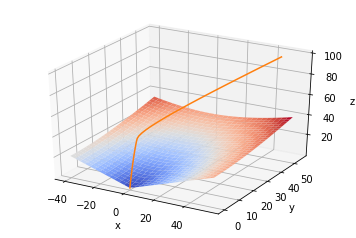

In [6]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#Have your solution be stored in p
ax.plot(xs=p.value[0,:].A1,ys=p.value[1,:].A1,zs=p.value[2,:].A1)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

-----





Problem (b) Touch-down Time
-------

In [9]:
start = 1
end = 35
K = (end + start)//2
p = Variable(3, K+1)
v = Variable(3, K+1)
f = Variable(3, K)

In [7]:
while start < end:
    K = (end + start)//2
    p = Variable(3, K+1)
    v = Variable(3, K+1)
    f = Variable(3, K)
    const = [v[:,i+1] == v[:,i] + (h/m)*f[:,i]-h*g*e3 for i in range(K)]
    const += [p[:,i+1] == p[:,i] + h/2*(v[:,i]+v[:,i+1]) for i in range(K)]
    const += [p[:,0]==p0, v[:,0]==v0, p[:,K]==0, v[:,K]==0]
    const += [p[2,i] >= alpha*norm(p[0:2,i]) for i in range(K+1)]
    const += [norm(f[:,i]) <= Fmax for i in range(K)]
    prob = Problem(Minimize(0), const)
    prob.solve()
    if prob.status=='optimal':
        end = K - 1
    else:
        start = K + 1
print(K)

25


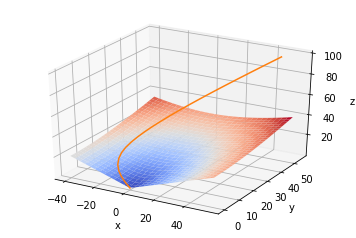

In [8]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#Have your solution be stored in p
ax.plot(xs=p.value[0,:].A1,ys=p.value[1,:].A1,zs=p.value[2,:].A1)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()